In [6]:
import pprint
import json
from greentranslator.api import GreenTranslator
green = GreenTranslator ()

In [7]:
# We'll use the Environmental Exposures endpoint to address the second part of the question:
#  > ... is exposure to particulate matter <=2.5 micrometers in diameter (PM2.5) 
#    and ozone associated with responsiveness to treatment?
exposures = green.exposures. \
    get_scores (exposure_type = 'pm25',
                start_date = '2010-01-07',
                end_date = '2010-01-31',
                exposure_point = '35.9131996,-79.0558445')
pprint.pprint (exposures[:2])

[{'end_time': datetime.datetime(2010, 1, 7, 23, 0, tzinfo=tzutc()),
 'exposure_type': 'pm25',
 'latitude': '35.9131996',
 'longitude': '-79.0558445',
 'start_time': datetime.datetime(2010, 1, 7, 0, 0, tzinfo=tzutc()),
 'units': '7dayrisk',
 'value': '4.714285714285714'},
 {'end_time': datetime.datetime(2010, 1, 8, 23, 0, tzinfo=tzutc()),
 'exposure_type': 'pm25',
 'latitude': '35.9131996',
 'longitude': '-79.0558445',
 'start_time': datetime.datetime(2010, 1, 8, 0, 0, tzinfo=tzutc()),
 'units': '7dayrisk',
 'value': '4.714285714285714'}]


In [8]:
print (green.exposures.prov_json ())

{
  "prefix": {
    "expo": "http://purl.translator.org/prov/expo",
    "enviro": "http://purl.translator.org/prov/enviro",
    "medbiochem": "http://purl.translator.org/prov/medbiochem",
    "expo.pm25-o3": "http://purl.translator.org/prov/expo.pm25-o3",
    "clinical.med.prescribed": "http://purl.translator.org/prov/clinical.med.prescribed",
    "blazegraph": "http://purl.translator.org/prov/blazegraph",
    "default": "http://purl.translator.org/prov/"
  },
  "activity": {
    "expo.pm25-o3": {
      "prov:startTime": "2017-04-28T14:41:26",
      "prov:endTime": "2017-04-28T14:41:26"
    }
  },
  "entity": {
    "expo:data": {
      "prov:type": "expo:data",
      "src": "expo"
    }
  }
}


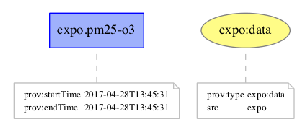

In [4]:
green.exposures.provenance.document.plot ()

In [5]:
%matplotlib inline

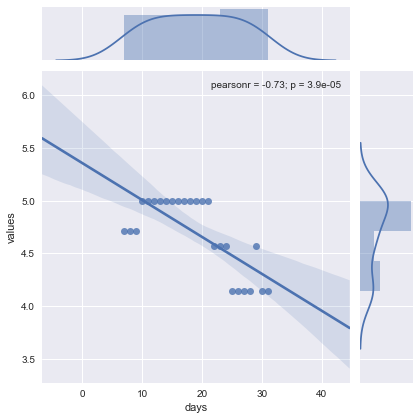

In [6]:
import seaborn as sns
import numpy as np
import pandas as pd

sns.jointplot(x="days",
              y="values",
              data = pd.DataFrame({
                  "days" : [ exposure.end_time.timetuple().tm_yday for exposure in exposures ],
                  "values" : [ float(exposure.value) for exposure in exposures ],
              }),
              kind='reg');

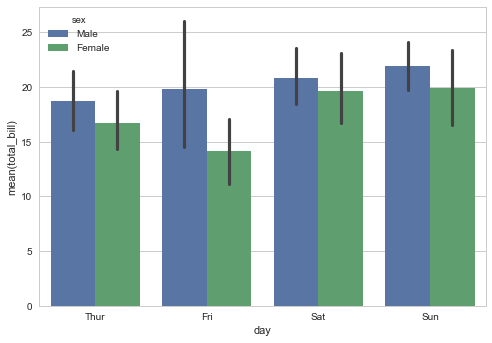

In [7]:
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

In [8]:
# http://bokeh.pydata.org/en/latest/docs/gallery/texas.html
# http://briank.im/determining-counties-from-longlat/
from bokeh.io import show, output_notebook
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

palette.reverse()

counties = {
    code: county for code, county in counties.items() if county["state"] == "nc"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
))

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    plot_width=900,
    plot_height=380,
    title="NC Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={ 'field': 'rate', 'transform': color_mapper },
          fill_alpha=0.7, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]
output_notebook()
show(p, new='window')

Loading BokehJS ...

In [17]:
print (unemployment)

{(1, 1): 9.7, (1, 3): 9.1, (1, 5): 13.4, (1, 7): 12.1, (1, 9): 9.9, (1, 11): 16.4, (1, 13): 16.7, (1, 15): 10.8, (1, 17): 18.6, (1, 19): 11.8, (1, 21): 9.9, (1, 23): 12.7, (1, 25): 17.0, (1, 27): 15.9, (1, 29): 10.4, (1, 31): 8.5, (1, 33): 11.4, (1, 35): 19.5, (1, 37): 14.0, (1, 39): 10.1, (1, 41): 9.7, (1, 43): 9.6, (1, 45): 9.3, (1, 47): 21.1, (1, 49): 14.3, (1, 51): 9.0, (1, 53): 12.9, (1, 55): 10.7, (1, 57): 12.8, (1, 59): 12.3, (1, 61): 10.0, (1, 63): 14.7, (1, 65): 12.7, (1, 67): 9.9, (1, 69): 8.9, (1, 71): 11.8, (1, 73): 10.7, (1, 75): 14.8, (1, 77): 10.5, (1, 79): 13.6, (1, 81): 8.6, (1, 83): 9.3, (1, 85): 18.5, (1, 87): 11.4, (1, 89): 7.5, (1, 91): 14.8, (1, 93): 15.2, (1, 95): 9.2, (1, 97): 11.1, (1, 99): 18.7, (1, 101): 10.2, (1, 103): 10.4, (1, 105): 19.8, (1, 107): 13.0, (1, 109): 8.7, (1, 111): 15.1, (1, 113): 12.6, (1, 115): 10.7, (1, 117): 7.6, (1, 119): 13.9, (1, 121): 13.6, (1, 123): 13.7, (1, 125): 9.0, (1, 127): 11.9, (1, 129): 15.1, (1, 131): 25.6, (1, 133): 17.5, 